In [40]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from random import shuffle, seed

from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.datasets import load_diabetes
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.inspection import permutation_importance

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split

from sklearn.model_selection import KFold, StratifiedKFold

In [2]:
news = pd.read_csv('data/all_responses_coded.csv')

In [3]:
news

,index,RespondentID,A1,A2,A3,A4,A5,A6,A7,A8,...,A55,A56,A57,A58,A59,A60,A61,A62,StartDate,EndDate
0,0,6176264298,0,0,1,0,0,0,1,0,...,0,0,1,0,0,0,0,0,5/1/17 15:41,5/1/17 15:43
1,1,6176263960,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,5/1/17 15:35,5/1/17 15:43
2,2,6176258621,0,0,0,1,0,0,1,0,...,0,0,0,0,0,1,0,0,5/1/17 15:38,5/1/17 15:40
3,3,6176257082,0,0,0,1,0,0,1,0,...,1,0,1,0,0,0,0,0,5/1/17 15:38,5/1/17 15:39
4,4,6176256111,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,5/1/17 15:34,5/1/17 15:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1016,6172551582,0,0,0,0,1,0,0,0,...,0,1,0,0,0,1,0,0,4/27/17 21:37,4/27/17 21:37
1017,1017,6172550900,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,4/27/17 21:35,4/27/17 21:37
1018,1018,6172550571,0,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,4/27/17 21:36,4/27/17 21:36
1019,1019,6172549839,0,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,4/27/17 21:34,4/27/17 21:36


In [4]:
news.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 66 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   index         1021 non-null   int64 
 1   RespondentID  1021 non-null   int64 
 2   A1            1021 non-null   int64 
 3   A2            1021 non-null   int64 
 4   A3            1021 non-null   int64 
 5   A4            1021 non-null   int64 
 6   A5            1021 non-null   int64 
 7   A6            1021 non-null   int64 
 8   A7            1021 non-null   int64 
 9   A8            1021 non-null   int64 
 10  A9            1021 non-null   int64 
 11  A10           1021 non-null   int64 
 12  A11           1021 non-null   int64 
 13  A12           1021 non-null   int64 
 14  A13           1021 non-null   int64 
 15  A14           1021 non-null   int64 
 16  A15           1021 non-null   int64 
 17  A16           1021 non-null   int64 
 18  A17           1021 non-null   int64 
 19  A18   

In [5]:
pd.options.display.max_columns = None

In [6]:
news

,index,RespondentID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A59,A60,A61,A62,StartDate,EndDate
0,0,6176264298,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,5/1/17 15:41,5/1/17 15:43
1,1,6176263960,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,5/1/17 15:35,5/1/17 15:43
2,2,6176258621,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,BBC,1,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,5/1/17 15:38,5/1/17 15:40
3,3,6176257082,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,"BBC News, and local news outlets",0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,5/1/17 15:38,5/1/17 15:39
4,4,6176256111,0,0,0,1,0,0,1,0,0,1,1,1,0,0,0,1,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,5/1/17 15:34,5/1/17 15:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016,1016,6172551582,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,4/27/17 21:37,4/27/17 21:37
1017,1017,6172550900,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,BBC,0,1,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,4/27/17 21:35,4/27/17 21:37
1018,1018,6172550571,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,None,1,0,0,1,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,4/27/17 21:36,4/27/17 21:36
1019,1019,6172549839,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,"Portland (Maine) Press Herald, local TV newscast",0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4/27/17 21:34,4/27/17 21:36


In [7]:
news.A21.value_counts()

0                                                                                                                                                                                                                                                                                   701
None                                                                                                                                                                                                                                                                                 31
NPR                                                                                                                                                                                                                                                                                  22
none                                                                                                                                                            

### Data cleanup

In [8]:
# set other news column as int64
news.loc[(news['A21'].str.lower() == 'none') | ( news['A21'] == '0'), 'other'] = 0
news.loc[~((news['A21'].str.lower() == 'none') | ( news['A21'] == '0')), 'other'] = 1
news['other'] = news['other'].astype('int64')

In [9]:
# Mark target column as int64:
#Very conservative, Conservative, Moderate, Liberal, Very liberal => 1,2,3,4,5
news.loc[news['A1'] == 1, 'target'] = 1
news.loc[news['A2'] == 1, 'target'] = 2
news.loc[news['A3'] == 1, 'target'] = 3
news.loc[news['A4'] == 1, 'target'] = 4
news.loc[news['A5'] == 1, 'target'] = 5
news['target'] = news['target'].astype('int64')

In [10]:
news_outlets = news.drop(columns=['A1', 'A2', 'A3', 'A4', 'A4', 'A5', 'A21', 'A59', 'RespondentID', 'StartDate', 'EndDate', 'index'])

array([[<AxesSubplot:title={'center':'A6'}>,
        <AxesSubplot:title={'center':'A7'}>,
        <AxesSubplot:title={'center':'A8'}>,
        <AxesSubplot:title={'center':'A9'}>,
        <AxesSubplot:title={'center':'A10'}>,
        <AxesSubplot:title={'center':'A11'}>,
        <AxesSubplot:title={'center':'A12'}>,
        <AxesSubplot:title={'center':'A13'}>],
       [<AxesSubplot:title={'center':'A14'}>,
        <AxesSubplot:title={'center':'A15'}>,
        <AxesSubplot:title={'center':'A16'}>,
        <AxesSubplot:title={'center':'A17'}>,
        <AxesSubplot:title={'center':'A18'}>,
        <AxesSubplot:title={'center':'A19'}>,
        <AxesSubplot:title={'center':'A20'}>,
        <AxesSubplot:title={'center':'A22'}>],
       [<AxesSubplot:title={'center':'A23'}>,
        <AxesSubplot:title={'center':'A24'}>,
        <AxesSubplot:title={'center':'A25'}>,
        <AxesSubplot:title={'center':'A26'}>,
        <AxesSubplot:title={'center':'A27'}>,
        <AxesSubplot:title={'center'

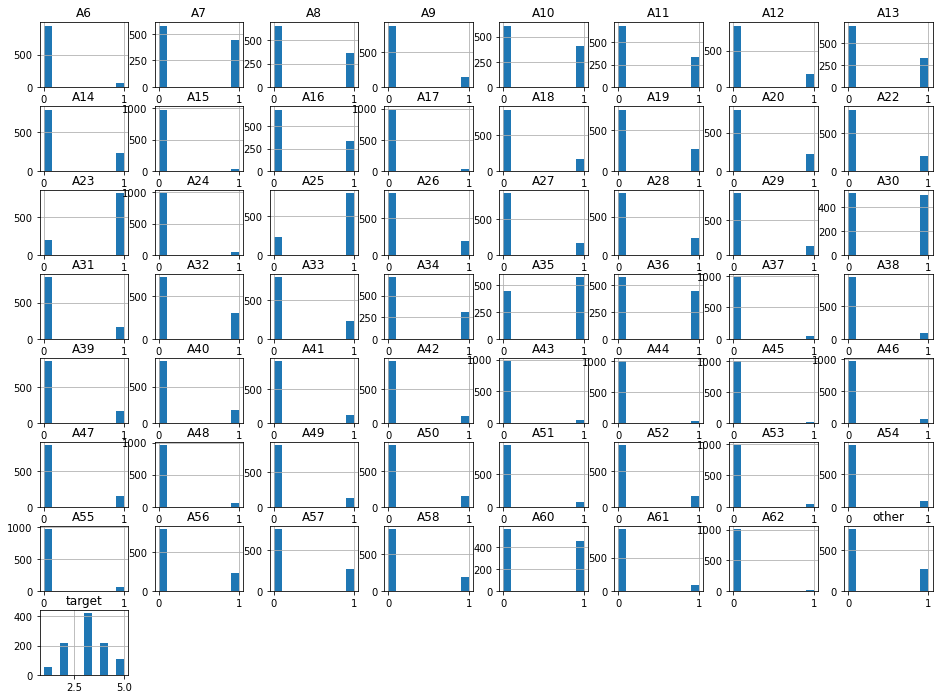

In [11]:
news_outlets.hist(figsize = (16, 12))

In [12]:
news_outlets.describe()

,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A60,A61,A62,other,target
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000
mean,0.068560,0.433888,0.357493,0.140059,0.401567,0.330069,0.173359,0.318315,0.224290,0.037218,0.329089,0.034280,0.162586,0.265426,0.213516,0.200784,0.799216,0.040157,0.775710,0.184133,0.163565,0.213516,0.128306,0.494613,0.167483,0.294809,0.229187,0.306562,0.561214,0.436827,0.045054,0.091087,0.164545,0.172380,0.114594,0.102840,0.047992,0.030362,0.019589,0.055828,0.153771,0.063663,0.126347,0.155730,0.079334,0.149853,0.040157,0.083252,0.057786,0.227228,0.260529,0.180215,0.449559,0.092067,0.015671,0.262488,3.114594
std,0.252829,0.495853,0.479496,0.347218,0.490455,0.470468,0.378743,0.466051,0.417318,0.189389,0.470113,0.182037,0.369168,0.441776,0.409990,0.400783,0.400783,0.196423,0.417318,0.387783,0.370062,0.409990,0.334594,0.500216,0.373589,0.456180,0.420516,0.461292,0.496482,0.496236,0.207524,0.287874,0.370951,0.377896,0.318687,0.303899,0.213854,0.171666,0.138650,0.229701,0.360906,0.244271,0.332403,0.362777,0.270392,0.357102,0.196423,0.276398,0.233454,0.419247,0.439138,0.384555,0.497693,0.289262,0.124260,0.440202,1.031652
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
75%,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.00

In [13]:
news_outlets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1021 entries, 0 to 1020
Data columns (total 57 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A6      1021 non-null   int64
 1   A7      1021 non-null   int64
 2   A8      1021 non-null   int64
 3   A9      1021 non-null   int64
 4   A10     1021 non-null   int64
 5   A11     1021 non-null   int64
 6   A12     1021 non-null   int64
 7   A13     1021 non-null   int64
 8   A14     1021 non-null   int64
 9   A15     1021 non-null   int64
 10  A16     1021 non-null   int64
 11  A17     1021 non-null   int64
 12  A18     1021 non-null   int64
 13  A19     1021 non-null   int64
 14  A20     1021 non-null   int64
 15  A22     1021 non-null   int64
 16  A23     1021 non-null   int64
 17  A24     1021 non-null   int64
 18  A25     1021 non-null   int64
 19  A26     1021 non-null   int64
 20  A27     1021 non-null   int64
 21  A28     1021 non-null   int64
 22  A29     1021 non-null   int64
 23  A30     1021 

In [14]:
X, y = news_outlets.drop(columns='target'), news_outlets['target']

In [15]:
# holdout method
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 93, test_size=0.3)

In [16]:
# # Evaluate holdout method
# train_mses = []
# test_mses = []

# for d in range(1,11):

#     #create pipeline with PolynomialFeatures and LinearRegression
#     #remember to set include_bias = False
#     pipe = Pipeline([('quad_features', PolynomialFeatures(degree = d, include_bias = False)),
#                      ('quad_model', LinearRegression())])
#     #fit pipeline on training data
#     pipe.fit(X_train, y_train)
    
#     #mse of training data
#     train_mse = mean_squared_error(y_train, pipe.predict(X_train))
#     train_mses.append(train_mse)
#     #mse of testing data
#     test_mse = mean_squared_error(y_test, pipe.predict(X_test))
#     test_mses.append(test_mse)

# best_model_complexity = test_mses.index(min(test_mses)) + 1


In [17]:
# # check effectiveness!
# print(f'The Complexity that minimized Test Error was: {test_mses.index(min(test_mses)) + 1}')
# plt.plot(range(1, 11), train_mses, '--o', label = 'training error')
# plt.plot(range(1, 11), test_mses, '--o', label = 'testing error')
# plt.xticks(range(1, 11), range(1, 11))
# plt.xlabel('Degree Complexity')
# plt.ylabel('Mean Squared Error')
# plt.legend()

In [18]:
# vif
def vif(exogs, data):
  vif_dict = {}

  for exog in exogs:
    not_exog = [i for i in exogs if i!=exog]
    X,y = data[not_exog], data[exog]

    # vif = 1 / (1- R^2)
    r_squared = LinearRegression().fit(X,y).score(X,y)
    if r_squared == 1:
        vif = 0
    else:
        vif = 1 / (1-r_squared)
    vif_dict[exog] = vif

  df_vif = pd.DataFrame({"VIF":vif_dict}).sort_values(by = "VIF", ascending = False)
  return df_vif

In [19]:
vif(X.columns,X)

,VIF
A56,13.304965
A50,10.177718
A52,9.935857
A49,8.678800
A54,6.324260
A51,6.112490
A48,5.192320
A55,4.808859
A53,3.744829
A10,2.141947


In [20]:
# compute permutation importance
lr = LinearRegression()
lr_model = lr.fit(X_train, y_train)
r = permutation_importance(lr_model, X_test, y_test, n_repeats = 10, random_state = 93)
pd.DataFrame({"Variable":X.columns, "Score":r.importances_mean}).sort_values(by = "Score", ascending = False)

,Variable,Score
29,A36,1.840137e+24
28,A35,1.837741e+24
23,A30,7.815598e+23
27,A34,7.708192e+23
25,A32,6.565028e+23
26,A33,5.944453e+23
21,A28,5.210399e+23
24,A31,4.561769e+23
20,A27,4.055938e+23
22,A29,3.718794e+23


In [21]:
# 

In [22]:
#Evaluate Kfold with 5 splits
train_mses = []
test_mses = []
# standardization before LR:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('quad_model', LinearRegression())])

kf = KFold(n_splits=5, random_state=93, shuffle=True)
for train_index, test_index in kf.split(X):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    #fit pipeline on training data
    pipe.fit(X_train, y_train)
    
    #mse of training data
    train_mse = mean_squared_error(y_train, pipe.predict(X_train))
    train_mses.append(train_mse)
    #mse of testing data
    test_mse = mean_squared_error(y_test, pipe.predict(X_test))
    test_mses.append(test_mse)

In [23]:
[np.mean(test_mses)]*5

[0.673811143508577,
 0.673811143508577,
 0.673811143508577,
 0.673811143508577,
 0.673811143508577]

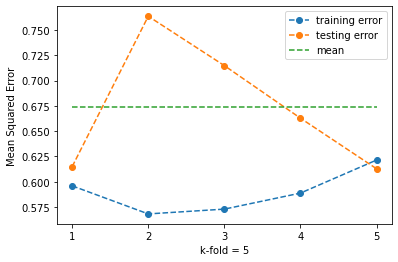

In [24]:
# check k-fold trend!
plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 6), [np.mean(test_mses)]*5, '--', label = 'mean')
plt.xticks(range(1, 6), range(1, 6))
plt.xlabel('k-fold = 5')
plt.ylabel('Mean Squared Error')
plt.legend()

In [25]:
df_mean = pd.DataFrame({"Columns":X.columns,
              "Mean":round(news_outlets[news_outlets['target'] == 5].drop(columns='target').mean())}
            ).T.reset_index().drop(columns='index', axis=1)


In [26]:
pipe.predict(df_mean.loc[1:,:])[0]

-18909267549811.6

In [27]:
df_median = pd.DataFrame({"Columns":X.columns,
              "Mean":round(news_outlets[news_outlets['target'] == 5].drop(columns='target').median())}
            ).T.reset_index().drop(columns='index', axis=1)
pipe.predict(df_median.loc[1:,:])[0]

-18909267549811.6

In [28]:
X_test[2:3]

,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,A16,A17,A18,A19,A20,A22,A23,A24,A25,A26,A27,A28,A29,A30,A31,A32,A33,A34,A35,A36,A37,A38,A39,A40,A41,A42,A43,A44,A45,A46,A47,A48,A49,A50,A51,A52,A53,A54,A55,A56,A57,A58,A60,A61,A62,other
10,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1


In [29]:
round(pipe.predict(X_test[12:13])[0]), y_test[12:13]

(2,
 49    2
 Name: target, dtype: int64)

In [34]:
round(pipe.predict(X_test[2:3])[0]), y_test[2:3]

(4,
 19    5
 Name: target, dtype: int64)

In [31]:
#Evaluate StratifiedKFold with 5 splits
train_mses = []
test_mses = []
# standardization before LR:
pipe = Pipeline([('scaler', StandardScaler()), 
                 ('quad_model', LinearRegression())])

skf = StratifiedKFold(n_splits=5, random_state=93, shuffle=True)
for train_index, test_index in skf.split(X, y):
    #print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

    #fit pipeline on training data
    pipe.fit(X_train, y_train)
    
    #mse of training data
    train_mse = mean_squared_error(y_train, pipe.predict(X_train))
    train_mses.append(train_mse)
    #mse of testing data
    test_mse = mean_squared_error(y_test, pipe.predict(X_test))
    test_mses.append(test_mse)

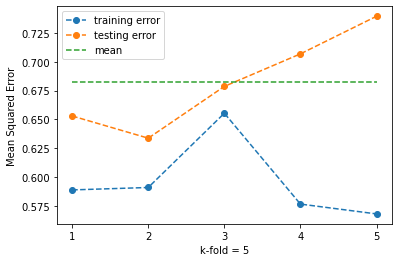

In [32]:
# check k-fold trend!
plt.plot(range(1, 6), train_mses, '--o', label = 'training error')
plt.plot(range(1, 6), test_mses, '--o', label = 'testing error')
plt.plot(range(1, 6), [np.mean(test_mses)]*5, '--', label = 'mean')
plt.xticks(range(1, 6), range(1, 6))
plt.xlabel('k-fold = 5')
plt.ylabel('Mean Squared Error')
plt.legend()

In [33]:
round(pipe.predict(X_test[14:15])[0]), y_test[14:15]

(3,
 87    2
 Name: target, dtype: int64)

In [35]:
round(pipe.predict(X_test[4:5])[0]), y_test[4:5]

(3,
 25    4
 Name: target, dtype: int64)

In [36]:
pipe.score(X_train, y_train)

0.46610510326910726

In [38]:
pipe.score(X_test, y_test)

0.30284124019004577

In [41]:
# check out cross validation scores on the dataset
cross_val_score(pipe, X, y, cv=5)

array([0.41628178, 0.34773639, 0.40263958, 0.29010406, 0.35413336])